# **MSFT EDA + Data Cleaning**

In [22]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4091    0  4091    0     0  26933      0 --:--:-- --:--:-- --:--:-- 27092
100  517k  100  517k    0     0  1192k      0 --:--:-- --:--:-- --:--:-- 1192k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4135    0  4135    0     0  29479      0 --:--:-- --:--:-- --:--:-- 29535
100  392k  100  392k    0     0  1067k      0 --:--:-- --:--:-- --:--:-- 1067k


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib

In [24]:
MSFT = pd.read_csv('/msft.csv')

In [25]:
MSFT.head()

,Date,Open,High,Low,Close,Volume,Adj. Close*
0,19-Sep-03,29.76,29.97,29.52,29.96,92433800,29.79
1,18-Sep-03,28.49,29.51,28.42,29.50,67268096,29.34
2,17-Sep-03,28.76,28.95,28.47,28.50,47221600,28.34
3,16-Sep-03,28.41,28.95,28.32,28.90,52060600,28.74
4,15-Sep-03,28.37,28.61,28.33,28.36,41432300,28.20


In [33]:
MSFT.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Adj. Close*    0
dtype: int64

In [34]:
MSFT.describe() # general insights on the data

,Open,High,Low,Close,Volume,Adj. Close*
count,65.000000,65.000000,65.000000,65.000000,6.500000e+01,65.000000
mean,26.774923,27.080308,26.491385,26.786000,5.531718e+07,26.636462
std,0.970459,1.018025,1.002822,1.087205,1.583936e+07,1.080904
min,25.390000,25.660000,25.140000,25.260000,2.760790e+07,25.120000
25%,26.090000,26.390000,25.600000,26.000000,4.581740e+07,25.850000
50%,26.510000,26.900000,26.230000,26.500000,5.265830e+07,26.350000
75%,27.420000,27.620000,27.100000,27.420000,6.239110e+07,27.270000
max,29.760000,29.970000,29.520000,29.960000,1.094378e+08,29.790000


In [36]:
MSFT.sort_values('Close')

,Date,Open,High,Low,Close,Volume,Adj. Close*
60,25-Jun-03,25.64,25.99,25.14,25.26,60483500,25.12
24,15-Aug-03,25.61,25.66,25.43,25.54,27607900,25.40
29,8-Aug-03,25.88,25.98,25.50,25.58,33241400,25.44
26,13-Aug-03,25.79,25.89,25.50,25.60,39636900,25.46
28,11-Aug-03,25.61,25.99,25.54,25.61,36433900,25.47
...,...,...,...,...,...,...,...
2,17-Sep-03,28.76,28.95,28.47,28.50,47221600,28.34
9,8-Sep-03,28.39,28.92,28.34,28.84,46105300,28.68
3,16-Sep-03,28.41,28.95,28.32,28.90,52060600,28.74
1,18-Sep-03,28.49,29.51,28.42,29.50,67268096,29.34


In [37]:
 MSFT.sort_values(by='Date', ascending=False)

,Date,Open,High,Low,Close,Volume,Adj. Close*
8,9-Sep-03,28.65,28.71,28.31,28.37,44315200,28.21
51,9-Jul-03,27.56,27.70,27.25,27.47,62300700,27.32
9,8-Sep-03,28.39,28.92,28.34,28.84,46105300,28.68
52,8-Jul-03,27.26,27.80,27.25,27.70,61896800,27.55
29,8-Aug-03,25.88,25.98,25.50,25.58,33241400,25.44
...,...,...,...,...,...,...,...
28,11-Aug-03,25.61,25.99,25.54,25.61,36433900,25.47
7,10-Sep-03,28.03,28.18,27.48,27.55,54763500,27.40
50,10-Jul-03,27.25,27.42,26.59,26.91,55350800,26.76
56,1-Jul-03,25.59,26.20,25.39,26.15,60926000,26.00



# **Calculating Moving averages & RSI metrics**

1. **RSI**: The Relative Strength Index (RSI), developed by J. Welles Wilder, is a momentum oscillator that measures the speed and change of price movements. The RSI oscillates between zero and 100. Traditionally the RSI is considered overbought when above 70 and oversold when below 30.

2. **Moving Averages**: A moving average is a statistic that captures the average change in a data series over time. In finance, moving averages are often used by technical analysts to keep track of price trends for specific securities. An upward trend in a moving average might signify an upswing in the price or momentum of a security, while a downward trend would be seen as a sign of decline.

In [38]:
# Calculate RSI of TSLA
MSFT['RSI'] = talib.RSI(MSFT['Close'])
MSFT.dropna()

,Date,Open,High,Low,Close,Volume,Adj. Close*,RSI
14,29-Aug-03,26.46,26.55,26.35,26.52,34503000,26.37,25.144509
15,28-Aug-03,26.50,26.58,26.24,26.51,46211200,26.36,25.105438
16,27-Aug-03,26.51,26.58,26.30,26.42,30633900,26.27,24.732955
17,26-Aug-03,26.31,26.67,25.96,26.57,47546000,26.42,26.685329
18,25-Aug-03,26.31,26.54,26.23,26.50,36132900,26.35,26.341932
19,22-Aug-03,26.78,26.95,26.21,26.22,65846300,26.07,24.958409
20,21-Aug-03,26.65,26.73,26.13,26.24,63802700,26.09,25.260367
21,20-Aug-03,26.30,26.53,26.00,26.45,56739300,26.30,28.513073
22,19-Aug-03,25.85,26.65,25.77,26.62,72952896,26.47,31.126209
23,18-Aug-03,25.56,25.83,25.46,25.70,45817400,25.56,25.659694











## __Daily Volatility Sort by Values (high to low)__

Volatility: Calculate the daily price range (high - low) to gauge the stock's volatility.



In [39]:
MSFT['Daily Volatility']=MSFT['High']-MSFT['Low']
MSFT

,Date,Open,High,Low,Close,Volume,Adj. Close*,RSI,Daily Volatility
0,19-Sep-03,29.76,29.97,29.52,29.96,92433800,29.79,NaN,0.45
1,18-Sep-03,28.49,29.51,28.42,29.50,67268096,29.34,NaN,1.09
2,17-Sep-03,28.76,28.95,28.47,28.50,47221600,28.34,NaN,0.48
3,16-Sep-03,28.41,28.95,28.32,28.90,52060600,28.74,NaN,0.63
4,15-Sep-03,28.37,28.61,28.33,28.36,41432300,28.20,NaN,0.28
...,...,...,...,...,...,...,...,...,...
60,25-Jun-03,25.64,25.99,25.14,25.26,60483500,25.12,36.570289,0.85
61,24-Jun-03,25.65,26.04,25.52,25.70,51820300,25.56,41.966446,0.52
62,23-Jun-03,26.14,26.24,25.49,25.78,52584500,25.64,42.917309,0.75
63,20-Jun-03,26.34,26.38,26.01,26.33,86048896,26.18,49.092853,0.37


In [41]:
MSFT_bydate = MSFT.sort_values(by='Daily Volatility', ascending=False)
MSFT_bydate

,Date,Open,High,Low,Close,Volume,Adj. Close*,RSI,Daily Volatility
59,26-Jun-03,25.39,26.51,25.21,25.75,51758100,25.61,40.460720,1.30
1,18-Sep-03,28.49,29.51,28.42,29.50,67268096,29.34,NaN,1.09
12,3-Sep-03,27.42,28.40,27.38,28.30,109437800,28.14,NaN,1.02
5,12-Sep-03,27.48,28.40,27.45,28.34,55777200,28.18,NaN,0.95
40,24-Jul-03,26.78,26.92,25.98,26.00,53556600,25.85,40.789487,0.94
...,...,...,...,...,...,...,...,...,...
4,15-Sep-03,28.37,28.61,28.33,28.36,41432300,28.20,NaN,0.28
16,27-Aug-03,26.51,26.58,26.30,26.42,30633900,26.27,24.732955,0.28
24,15-Aug-03,25.61,25.66,25.43,25.54,27607900,25.40,24.842553,0.23
14,29-Aug-03,26.46,26.55,26.35,26.52,34503000,26.37,25.144509,0.20


# __Data Visualizations__

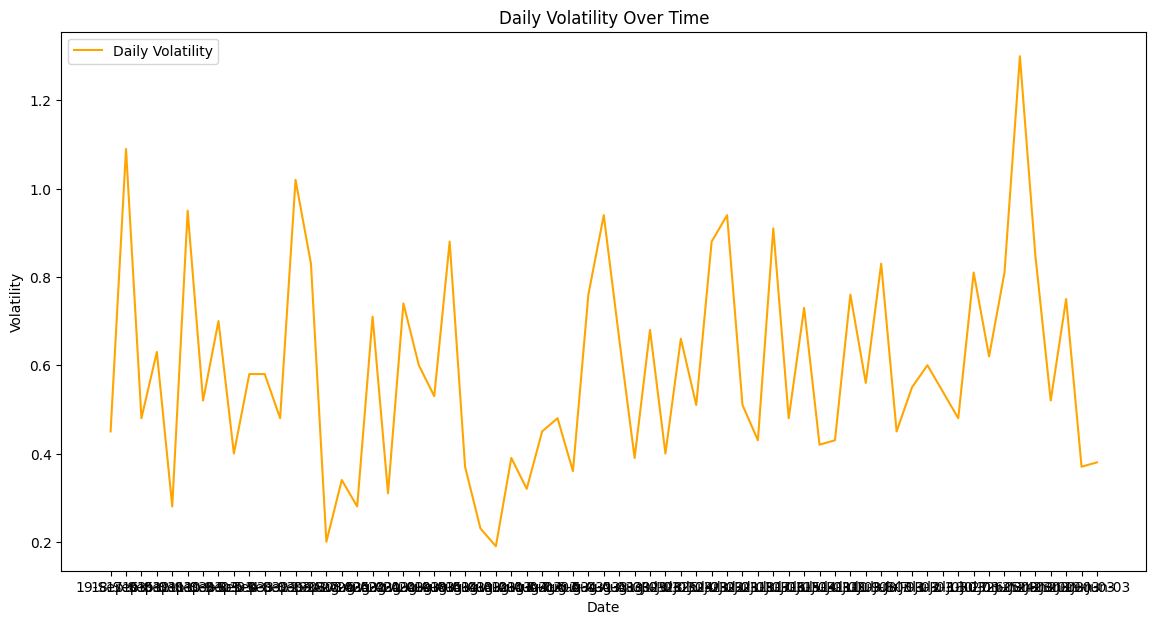

In [42]:
# 'Daily Volatility Over Time'
plt.figure(figsize=(14, 7))
plt.plot(MSFT['Date'], MSFT['Daily Volatility'], label='Daily Volatility', color='orange')
plt.title('Daily Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

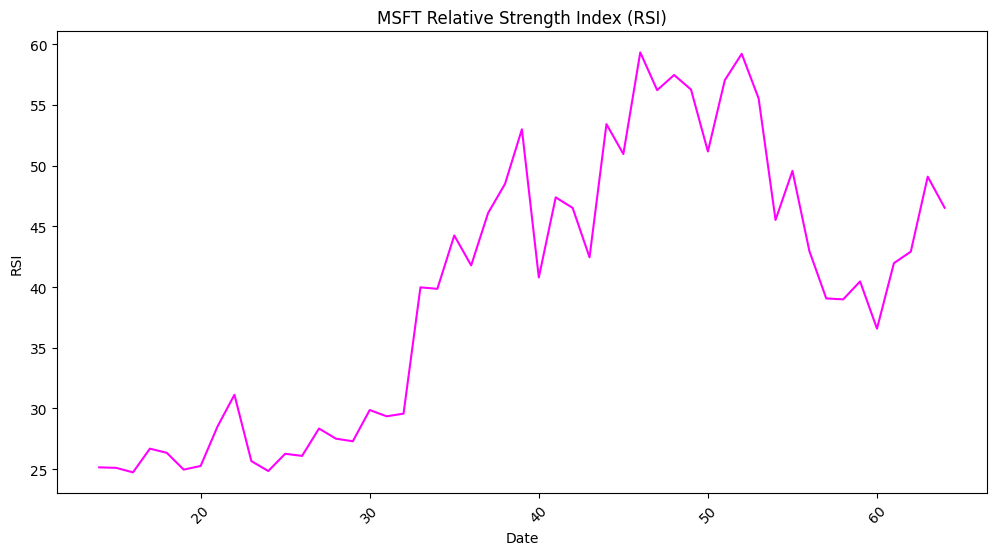

In [43]:
# Plotting RSI of TSLA over time
plt.figure(figsize=(12, 6))
plt.plot(MSFT['RSI'], color='magenta')
plt.title('MSFT Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.xticks(rotation=45)
plt.show()